In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)
data=pd.read_csv('./vdjdb.txt',sep='\t', header=0)

data

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,antigen.gene,antigen.species,reference.id,method,meta,cdr3fix,vdjdb.score,web.method,web.method.seq,web.cdr3fix.nc,web.cdr3fix.unmp
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CIVRAPGRADMRF"", ""cdr3_old"": ""CIVRAPG...",2,sort,sanger,no,no
1,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSYLPGQGDHYSNQPQHF"", ""cdr3_old"": ""...",2,sort,sanger,no,no
2,0,TRB,CASSFEAGQGFFSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSFEAGQGFFSNQPQHF"", ""cdr3_old"": ""C...",2,sort,sanger,no,no
3,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CAVPSGAGSYQLTF"", ""cdr3_old"": ""CAVPSG...",2,sort,sanger,no,no
4,2,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,PMID:15596521,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD8+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSFEPGQGFYSNQPQHF"", ""cdr3_old"": ""C...",2,sort,sanger,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92766,30592,TRB,CASSPGQGGDNEQFF,TRBV7-3*01,TRBJ2-1*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,Gluten,Wheat,PMID:33927715,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD4+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSPGQGGDNEQFF"", ""cdr3_old"": ""CASSP...",0,sort,singlecell,no,no
92767,30593,TRA,CAPQGATNKLIF,TRAV12-2*01,TRAJ32*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,Gluten,Wheat,PMID:33927715,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD4+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CAPQGATNKLIF"", ""cdr3_old"": ""CAPQGATN...",2,sort,singlecell,no,no
92768,30593,TRB,CASSLGAGGQETQYF,TRBV5-1*01,TRBJ2-5*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,Gluten,Wheat,PMID:33927715,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD4+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CASSLGAGGQETQYF"", ""cdr3_old"": ""CASSL...",2,sort,singlecell,no,no
92769,30594,TRA,CLVGGSGGYNKLIF,TRAV4*01,TRAJ4*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,Gluten,Wheat,PMID:33927715,"{""frequency"": """", ""identification"": ""tetramer-...","{""cell.subset"": ""CD4+"", ""clone.id"": """", ""donor...","{""cdr3"": ""CLVGGSGGYNKLIF"", ""cdr3_old"": ""CLVGGS...",0,sort,singlecell,no,no


In [2]:
columns_to_drop = ['reference.id', 'method', 'meta','cdr3fix','web.method','web.method.seq','web.cdr3fix.nc','web.cdr3fix.unmp']

In [3]:
data.drop(columns=columns_to_drop, inplace=True)

In [4]:
data

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,antigen.gene,antigen.species,vdjdb.score
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2
1,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2
2,0,TRB,CASSFEAGQGFFSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2
3,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2
4,2,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92766,30592,TRB,CASSPGQGGDNEQFF,TRBV7-3*01,TRBJ2-1*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,Gluten,Wheat,0
92767,30593,TRA,CAPQGATNKLIF,TRAV12-2*01,TRAJ32*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,Gluten,Wheat,2
92768,30593,TRB,CASSLGAGGQETQYF,TRBV5-1*01,TRBJ2-5*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,Gluten,Wheat,2
92769,30594,TRA,CLVGGSGGYNKLIF,TRAV4*01,TRAJ4*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,Gluten,Wheat,0


In [5]:
# Print first 5 rows of the dataframe
data.head(5)

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,antigen.gene,antigen.species,vdjdb.score
0,1,TRA,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2
1,1,TRB,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2
2,0,TRB,CASSFEAGQGFFSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2
3,2,TRA,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2
4,2,TRB,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,MHCI,FLKEKGGL,Nef,HIV-1,2


In [6]:
# Print last 5 rows of the dataframe
data.tail(5)

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,antigen.gene,antigen.species,vdjdb.score
92766,30592,TRB,CASSPGQGGDNEQFF,TRBV7-3*01,TRBJ2-1*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,Gluten,Wheat,0
92767,30593,TRA,CAPQGATNKLIF,TRAV12-2*01,TRAJ32*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,Gluten,Wheat,2
92768,30593,TRB,CASSLGAGGQETQYF,TRBV5-1*01,TRBJ2-5*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,Gluten,Wheat,2
92769,30594,TRA,CLVGGSGGYNKLIF,TRAV4*01,TRAJ4*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,Gluten,Wheat,0
92770,30594,TRB,CASSSTAQETQYF,TRBV11-2*01,TRBJ2-5*01,HomoSapiens,HLA-DQA1*05:01,HLA-DQB1*02:01,MHCII,PQQPFPQPEQPFP,Gluten,Wheat,0


In [7]:
data['cdr3'].value_counts()

CASSIRSSYEQYF        361
CAASETSYDKVIF        157
CASSWGGGSHYGYTF      154
CAIGPGNMLTF          153
CAGGGSQGNLIF         144
                    ... 
CAENISNAGNMLTF         1
CASSPGQGSEQYF          1
CAGSYSGGGADGLTF        1
CASSLEAGYRDTDTQYF      1
CASSSTAQETQYF          1
Name: cdr3, Length: 68994, dtype: int64

In [8]:
data['species'].value_counts()

HomoSapiens      85329
MusMusculus       5323
MacacaMulatta     2119
Name: species, dtype: int64

In [9]:
data['mhc.a'].value_counts()

HLA-A*03:01    29264
HLA-A*02:01    16511
HLA-A*02       15053
HLA-A*11:01     5433
HLA-B*08:01     2961
               ...  
HLA-C*06:02        2
HLA-A*32:01        1
HLA-B*14:02        1
HLA-C*04:01        1
HLA-B*52:01        1
Name: mhc.a, Length: 119, dtype: int64

In [10]:
data['mhc.b'].value_counts()

B2M                     88368
HLA-DRB1*01              1215
HLA-DPB*04:01             937
HLA-DRB5*01:01            348
HLA-DQB1*02:01            328
HLA-DRB1*15               311
HLA-DRB1*04:01            288
HLA-DRB1*11:01            218
HLA-DRA*01:01             119
HLA-DRB1*07:01            113
HLA-DRB1*15:01            112
HLA-DRB1*01:01            101
H-2Aa                      38
HLA-DPB1*04:01             38
HLA-DRB1*15:02             29
HLA-DQB1*03:02:12          18
HLA-DQB1*06:01             18
HLA-DPB1*13:01             16
H-2Eb1                     14
HLA-DRB1*01:01:01          14
HLA-DQB1*02:01:08          12
HLA-DQB1*06:02             12
HLA-DQB1*03:02             12
HLA-DRB1*03:01             10
HLA-DRB1*04:01:01          10
HLA-DRB1*15:03              8
HLA-DRB3*03:01              8
HLA-DQB1*05:01:01:03        6
HLA-DQB1*02                 6
HLA-DQB1*03:01              6
HLA-DRB1*11:01:02           4
HLA-DRB3*02:02              4
HLA-DRB1*15:01:01:04        4
HLA-DQB1*0

In [11]:
data['antigen.epitope'].value_counts()

KLGGALQAK     27948
GILGFVFTL     10024
NLVPMVATV      8004
AVFDRKSDAK     3546
RAKFKQLL       2756
              ...  
SSSKLWAQY         1
TLVPQEHYV         1
SFLPGVYSV         1
RYLALYNKY         1
IPIQASLSF         1
Name: antigen.epitope, Length: 1169, dtype: int64

In [12]:
data['antigen.gene'].value_counts()

IE1        28150
M          10099
pp65        9331
EBNA4       5032
Spike       4507
           ...  
CADPS2         1
RNF10          1
ZFYVE27        1
SNX24          1
KARS           1
Name: antigen.gene, Length: 268, dtype: int64

In [13]:
data['antigen.species'].value_counts()

CMV                          38345
InfluenzaA                   15182
EBV                          11440
SARS-CoV-2                   10133
HomoSapiens                   5095
HIV-1                         3554
HCV                           2359
SIV                           2119
MCMV                          1463
YFV                            789
Wheat                          301
PlasmodiumBerghei              245
HTLV-1                         234
DENV1                          182
DENV3/4                        179
HIV                            162
HSV-2                          154
LCMV                           151
RSV                            125
synthetic                       92
VSV                             66
M.tuberculosis                  64
DENV2                           60
HCoV-HKU1                       57
TriticumAestivum                53
MusMusculus                     50
HPV                             28
GallusGallus                    16
AdV                 

In [14]:
data['vdjdb.score'].value_counts()

0    80357
1     8329
2     2336
3     1749
Name: vdjdb.score, dtype: int64

In [15]:
data.isna().sum()

complex.id            0
gene                  0
cdr3                  0
v.segm              101
j.segm             1145
species               0
mhc.a                 0
mhc.b                 0
mhc.class             0
antigen.epitope       0
antigen.gene         62
antigen.species       0
vdjdb.score           0
dtype: int64

In [16]:
df_original = data

In [17]:
# first one-hot encode the categorical columns with NaNs

data = pd.get_dummies(data, columns=['antigen.gene'], 
                        dummy_na=True, 
                        drop_first=True)
data.tail()

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,antigen.species,vdjdb.score,antigen.gene_5T4,antigen.gene_8F10,antigen.gene_ABCB5,antigen.gene_ABCD3,antigen.gene_ACTN4,antigen.gene_AFMID,antigen.gene_AHNAK,antigen.gene_AKAP13,antigen.gene_AKAP9,antigen.gene_AMPH,antigen.gene_ANKRD30A,antigen.gene_API5,antigen.gene_ARHGAP35,antigen.gene_ARMT1,antigen.gene_ASTN1,antigen.gene_BCL2L1,antigen.gene_BCR-ABL,antigen.gene_BMLF1,antigen.gene_BRAF,antigen.gene_BRAP,antigen.gene_BRLF1,antigen.gene_BST2,antigen.gene_BZLF1,antigen.gene_CADPS2,antigen.gene_CASP8,antigen.gene_CCND1,antigen.gene_CD74,antigen.gene_CDK4,antigen.gene_CDKN2A,antigen.gene_CENPL,antigen.gene_CFP10,antigen.gene_COL18A1,antigen.gene_CORE,antigen.gene_CRISPLD1,antigen.gene_CTBP1,antigen.gene_CTSB,antigen.gene_DBH,antigen.gene_DPY19L4,antigen.gene_DQ2-GLIA-OMEGA1,antigen.gene_DQ8-GLIA-ALPHA1,antigen.gene_DQ8.5-GLIA-GAMMA1,antigen.gene_Der,antigen.gene_E2,antigen.gene_E6,antigen.gene_E7,antigen.gene_EBNA1,antigen.gene_EBNA3A,antigen.gene_EBNA3B,antigen.gene_EBNA4,antigen.gene_EBNA6,antigen.gene_ELAVL4,antigen.gene_EMC,antigen.gene_ENR,antigen.gene_ERBB2,antigen.gene_ERBB2IP,antigen.gene_EXOC8,antigen.gene_Envelope,antigen.gene_FANCI,antigen.gene_FBXO21,antigen.gene_FGFR3,antigen.gene_FNDC3B,antigen.gene_GAG,antigen.gene_GANAB,antigen.gene_GAP50,antigen.gene_GCN1L1,antigen.gene_GEMIN,antigen.gene_GINS1,antigen.gene_GLUT-L1,antigen.gene_GNB5,antigen.gene_GNL3L,antigen.gene_GPC,antigen.gene_GPD2,antigen.gene_Gag,antigen.gene_Gliadin,antigen.gene_Gluten,antigen.gene_Gp33,antigen.gene_Gp33(PA),antigen.gene_Gp33(PF),antigen.gene_Gp33(Y4A),antigen.gene_Gp33-41,antigen.gene_Gtpbp1,antigen.gene_H3F3B,antigen.gene_HA,antigen.gene_HELZ2,antigen.gene_HER2,antigen.gene_HEXON,antigen.gene_HIVEP2,antigen.gene_HSD17B12,antigen.gene_IE-1,antigen.gene_IE1,antigen.gene_IE2,antigen.gene_IE3,antigen.gene_IGF2BP2,antigen.gene_INS,antigen.gene_INS-DRiP,antigen.gene_KARS,antigen.gene_KIAA0368,antigen.gene_KIAA1279,antigen.gene_KIAA1967,antigen.gene_KIF16B,antigen.gene_KLHL7,antigen.gene_KLK3,antigen.gene_KRAS,antigen.gene_KanJ,antigen.gene_Kctd20,antigen.gene_LGSN,antigen.gene_LMP1,antigen.gene_LMP2A,antigen.gene_LYZ,antigen.gene_Leader peptide,antigen.gene_M,antigen.gene_M1,antigen.gene_M1-F5L,antigen.gene_M1-G4E,antigen.gene_M2-1,antigen.gene_M38,antigen.gene_M45,antigen.gene_MAGE-A1,antigen.gene_MAGE-A2,antigen.gene_MAGE-A3,antigen.gene_MAGE-A4,antigen.gene_MAGEA1,antigen.gene_MAGEA3,antigen.gene_MAGEA6,antigen.gene_MART1,antigen.gene_MBP,antigen.gene_MCC,antigen.gene_MCC-P5E,antigen.gene_ME1,antigen.gene_MED13,antigen.gene_MEROPS,antigen.gene_MIM2,antigen.gene_MLANA,antigen.gene_MLL2,antigen.gene_MPV17,antigen.gene_MUC5AC,antigen.gene_Matrix,antigen.gene_Mbp,antigen.gene_Mimotope,antigen.gene_N,antigen.gene_NBAS,antigen.gene_NDC1,antigen.gene_NP,antigen.gene_NP338,antigen.gene_NRAS,antigen.gene_NS3,antigen.gene_NS4B,antigen.gene_NS5B,antigen.gene_NSP12,antigen.gene_NSP3,antigen.gene_NUP98,antigen.gene_NY-ESO,antigen.gene_NY-ESO-1,antigen.gene_NY-ESO-2,antigen.gene_NY-ESO-3,antigen.gene_NY-ESO-4,antigen.gene_NY-ESO-5,antigen.gene_NY-ESO-6,antigen.gene_Ndufa4,antigen.gene_Nef,antigen.gene_Nucleocapsid,antigen.gene_OPT,antigen.gene_ORF10,antigen.gene_ORF14,antigen.gene_ORF1a,antigen.gene_ORF1ab,antigen.gene_ORF3,antigen.gene_ORF6,antigen.gene_ORF7a,antigen.gene_ORF7b,antigen.gene_ORF8,antigen.gene_ORF9b,antigen.gene_OVA,antigen.gene_Ovotransferrin,antigen.gene_P18-I10,antigen.gene_P24,antigen.gene_P53,antigen.gene_PA,antigen.gene_PABPC1,antigen.gene_PADI4,antigen.gene_PB1,antigen.gene_PCPA12,antigen.gene_PCPB7,antigen.gene_PCPB9,antigen.gene_PCPC5,antigen.gene_PCPE3,antigen.gene_PDE4A,antigen.gene_PDE7B,antigen.gene_PDS5A,antigen.gene_PGM5,antigen.gene_PHKA1,antigen.gene_PHLPP1,antigen.gene_PIK3CA,antigen.gene_PLA2G6,antigen.gene_PLCD3,antigen.gene_PMEL,antigen.gene_POGK,antigen.gene_PORCN,antigen.gene_PPE33,antigen.gene_PPM1,antigen.gene_PPM1F,antigen.gene_PT

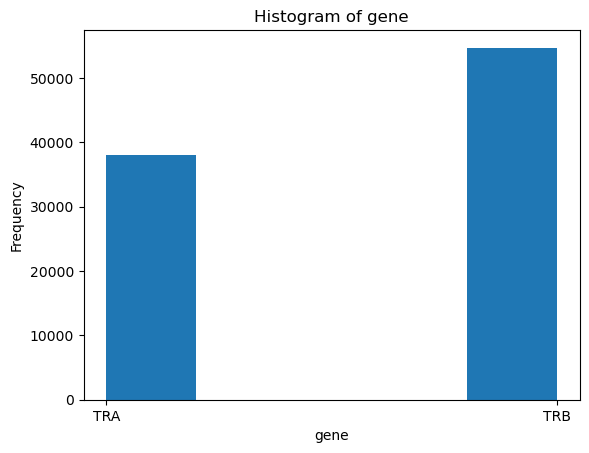

In [18]:
import matplotlib.pyplot as plt

plt.hist(data['gene'], bins=5)  # 可以调整bin的数量
plt.xlabel('gene')
plt.ylabel('Frequency')
plt.title('Histogram of gene')
plt.show()


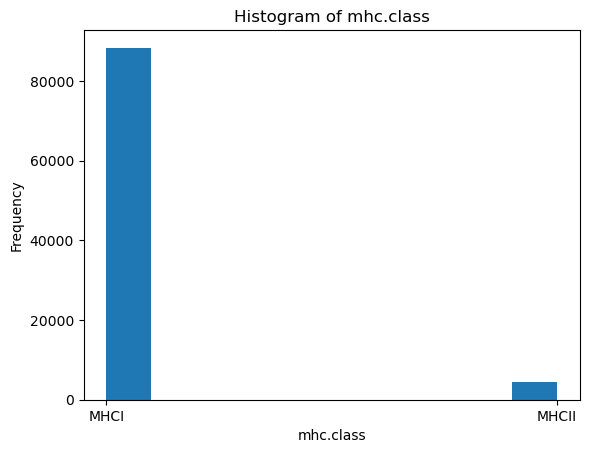

In [19]:
import matplotlib.pyplot as plt

plt.hist(data['mhc.class'])  # 可以调整bin的数量
plt.xlabel('mhc.class')
plt.ylabel('Frequency')
plt.title('Histogram of mhc.class')
plt.show()


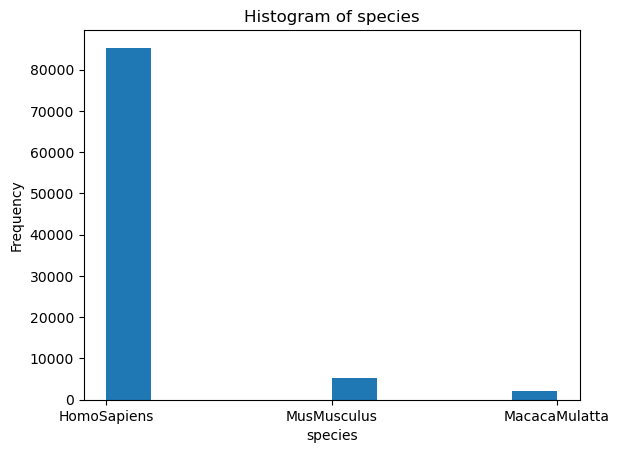

In [20]:
import matplotlib.pyplot as plt

plt.hist(data['species'])  # 可以调整bin的数量
plt.xlabel('species')
plt.ylabel('Frequency')
plt.title('Histogram of species')
plt.show()


In [21]:
# Create a mapper

scale_mapper = {
    "TRA": 0,
    "TRB": 1
}

data['gene'] = data['gene'].replace(scale_mapper)

data.tail()

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,antigen.species,vdjdb.score,antigen.gene_5T4,antigen.gene_8F10,antigen.gene_ABCB5,antigen.gene_ABCD3,antigen.gene_ACTN4,antigen.gene_AFMID,antigen.gene_AHNAK,antigen.gene_AKAP13,antigen.gene_AKAP9,antigen.gene_AMPH,antigen.gene_ANKRD30A,antigen.gene_API5,antigen.gene_ARHGAP35,antigen.gene_ARMT1,antigen.gene_ASTN1,antigen.gene_BCL2L1,antigen.gene_BCR-ABL,antigen.gene_BMLF1,antigen.gene_BRAF,antigen.gene_BRAP,antigen.gene_BRLF1,antigen.gene_BST2,antigen.gene_BZLF1,antigen.gene_CADPS2,antigen.gene_CASP8,antigen.gene_CCND1,antigen.gene_CD74,antigen.gene_CDK4,antigen.gene_CDKN2A,antigen.gene_CENPL,antigen.gene_CFP10,antigen.gene_COL18A1,antigen.gene_CORE,antigen.gene_CRISPLD1,antigen.gene_CTBP1,antigen.gene_CTSB,antigen.gene_DBH,antigen.gene_DPY19L4,antigen.gene_DQ2-GLIA-OMEGA1,antigen.gene_DQ8-GLIA-ALPHA1,antigen.gene_DQ8.5-GLIA-GAMMA1,antigen.gene_Der,antigen.gene_E2,antigen.gene_E6,antigen.gene_E7,antigen.gene_EBNA1,antigen.gene_EBNA3A,antigen.gene_EBNA3B,antigen.gene_EBNA4,antigen.gene_EBNA6,antigen.gene_ELAVL4,antigen.gene_EMC,antigen.gene_ENR,antigen.gene_ERBB2,antigen.gene_ERBB2IP,antigen.gene_EXOC8,antigen.gene_Envelope,antigen.gene_FANCI,antigen.gene_FBXO21,antigen.gene_FGFR3,antigen.gene_FNDC3B,antigen.gene_GAG,antigen.gene_GANAB,antigen.gene_GAP50,antigen.gene_GCN1L1,antigen.gene_GEMIN,antigen.gene_GINS1,antigen.gene_GLUT-L1,antigen.gene_GNB5,antigen.gene_GNL3L,antigen.gene_GPC,antigen.gene_GPD2,antigen.gene_Gag,antigen.gene_Gliadin,antigen.gene_Gluten,antigen.gene_Gp33,antigen.gene_Gp33(PA),antigen.gene_Gp33(PF),antigen.gene_Gp33(Y4A),antigen.gene_Gp33-41,antigen.gene_Gtpbp1,antigen.gene_H3F3B,antigen.gene_HA,antigen.gene_HELZ2,antigen.gene_HER2,antigen.gene_HEXON,antigen.gene_HIVEP2,antigen.gene_HSD17B12,antigen.gene_IE-1,antigen.gene_IE1,antigen.gene_IE2,antigen.gene_IE3,antigen.gene_IGF2BP2,antigen.gene_INS,antigen.gene_INS-DRiP,antigen.gene_KARS,antigen.gene_KIAA0368,antigen.gene_KIAA1279,antigen.gene_KIAA1967,antigen.gene_KIF16B,antigen.gene_KLHL7,antigen.gene_KLK3,antigen.gene_KRAS,antigen.gene_KanJ,antigen.gene_Kctd20,antigen.gene_LGSN,antigen.gene_LMP1,antigen.gene_LMP2A,antigen.gene_LYZ,antigen.gene_Leader peptide,antigen.gene_M,antigen.gene_M1,antigen.gene_M1-F5L,antigen.gene_M1-G4E,antigen.gene_M2-1,antigen.gene_M38,antigen.gene_M45,antigen.gene_MAGE-A1,antigen.gene_MAGE-A2,antigen.gene_MAGE-A3,antigen.gene_MAGE-A4,antigen.gene_MAGEA1,antigen.gene_MAGEA3,antigen.gene_MAGEA6,antigen.gene_MART1,antigen.gene_MBP,antigen.gene_MCC,antigen.gene_MCC-P5E,antigen.gene_ME1,antigen.gene_MED13,antigen.gene_MEROPS,antigen.gene_MIM2,antigen.gene_MLANA,antigen.gene_MLL2,antigen.gene_MPV17,antigen.gene_MUC5AC,antigen.gene_Matrix,antigen.gene_Mbp,antigen.gene_Mimotope,antigen.gene_N,antigen.gene_NBAS,antigen.gene_NDC1,antigen.gene_NP,antigen.gene_NP338,antigen.gene_NRAS,antigen.gene_NS3,antigen.gene_NS4B,antigen.gene_NS5B,antigen.gene_NSP12,antigen.gene_NSP3,antigen.gene_NUP98,antigen.gene_NY-ESO,antigen.gene_NY-ESO-1,antigen.gene_NY-ESO-2,antigen.gene_NY-ESO-3,antigen.gene_NY-ESO-4,antigen.gene_NY-ESO-5,antigen.gene_NY-ESO-6,antigen.gene_Ndufa4,antigen.gene_Nef,antigen.gene_Nucleocapsid,antigen.gene_OPT,antigen.gene_ORF10,antigen.gene_ORF14,antigen.gene_ORF1a,antigen.gene_ORF1ab,antigen.gene_ORF3,antigen.gene_ORF6,antigen.gene_ORF7a,antigen.gene_ORF7b,antigen.gene_ORF8,antigen.gene_ORF9b,antigen.gene_OVA,antigen.gene_Ovotransferrin,antigen.gene_P18-I10,antigen.gene_P24,antigen.gene_P53,antigen.gene_PA,antigen.gene_PABPC1,antigen.gene_PADI4,antigen.gene_PB1,antigen.gene_PCPA12,antigen.gene_PCPB7,antigen.gene_PCPB9,antigen.gene_PCPC5,antigen.gene_PCPE3,antigen.gene_PDE4A,antigen.gene_PDE7B,antigen.gene_PDS5A,antigen.gene_PGM5,antigen.gene_PHKA1,antigen.gene_PHLPP1,antigen.gene_PIK3CA,antigen.gene_PLA2G6,antigen.gene_PLCD3,antigen.gene_PMEL,antigen.gene_POGK,antigen.gene_PORCN,antigen.gene_PPE33,antigen.gene_PPM1,antigen.gene_PPM1F,antigen.gene_PT

In [22]:
from sklearn.preprocessing import LabelEncoder

# 创建LabelEncoder对象
label_encoder = LabelEncoder()

# 对非数值列进行标签编码
data['species'] = label_encoder.fit_transform(data['species'])


In [23]:
data

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,antigen.species,vdjdb.score,antigen.gene_5T4,antigen.gene_8F10,antigen.gene_ABCB5,antigen.gene_ABCD3,antigen.gene_ACTN4,antigen.gene_AFMID,antigen.gene_AHNAK,antigen.gene_AKAP13,antigen.gene_AKAP9,antigen.gene_AMPH,antigen.gene_ANKRD30A,antigen.gene_API5,antigen.gene_ARHGAP35,antigen.gene_ARMT1,antigen.gene_ASTN1,antigen.gene_BCL2L1,antigen.gene_BCR-ABL,antigen.gene_BMLF1,antigen.gene_BRAF,antigen.gene_BRAP,antigen.gene_BRLF1,antigen.gene_BST2,antigen.gene_BZLF1,antigen.gene_CADPS2,antigen.gene_CASP8,antigen.gene_CCND1,antigen.gene_CD74,antigen.gene_CDK4,antigen.gene_CDKN2A,antigen.gene_CENPL,antigen.gene_CFP10,antigen.gene_COL18A1,antigen.gene_CORE,antigen.gene_CRISPLD1,antigen.gene_CTBP1,antigen.gene_CTSB,antigen.gene_DBH,antigen.gene_DPY19L4,antigen.gene_DQ2-GLIA-OMEGA1,antigen.gene_DQ8-GLIA-ALPHA1,antigen.gene_DQ8.5-GLIA-GAMMA1,antigen.gene_Der,antigen.gene_E2,antigen.gene_E6,antigen.gene_E7,antigen.gene_EBNA1,antigen.gene_EBNA3A,antigen.gene_EBNA3B,antigen.gene_EBNA4,antigen.gene_EBNA6,antigen.gene_ELAVL4,antigen.gene_EMC,antigen.gene_ENR,antigen.gene_ERBB2,antigen.gene_ERBB2IP,antigen.gene_EXOC8,antigen.gene_Envelope,antigen.gene_FANCI,antigen.gene_FBXO21,antigen.gene_FGFR3,antigen.gene_FNDC3B,antigen.gene_GAG,antigen.gene_GANAB,antigen.gene_GAP50,antigen.gene_GCN1L1,antigen.gene_GEMIN,antigen.gene_GINS1,antigen.gene_GLUT-L1,antigen.gene_GNB5,antigen.gene_GNL3L,antigen.gene_GPC,antigen.gene_GPD2,antigen.gene_Gag,antigen.gene_Gliadin,antigen.gene_Gluten,antigen.gene_Gp33,antigen.gene_Gp33(PA),antigen.gene_Gp33(PF),antigen.gene_Gp33(Y4A),antigen.gene_Gp33-41,antigen.gene_Gtpbp1,antigen.gene_H3F3B,antigen.gene_HA,antigen.gene_HELZ2,antigen.gene_HER2,antigen.gene_HEXON,antigen.gene_HIVEP2,antigen.gene_HSD17B12,antigen.gene_IE-1,antigen.gene_IE1,antigen.gene_IE2,antigen.gene_IE3,antigen.gene_IGF2BP2,antigen.gene_INS,antigen.gene_INS-DRiP,antigen.gene_KARS,antigen.gene_KIAA0368,antigen.gene_KIAA1279,antigen.gene_KIAA1967,antigen.gene_KIF16B,antigen.gene_KLHL7,antigen.gene_KLK3,antigen.gene_KRAS,antigen.gene_KanJ,antigen.gene_Kctd20,antigen.gene_LGSN,antigen.gene_LMP1,antigen.gene_LMP2A,antigen.gene_LYZ,antigen.gene_Leader peptide,antigen.gene_M,antigen.gene_M1,antigen.gene_M1-F5L,antigen.gene_M1-G4E,antigen.gene_M2-1,antigen.gene_M38,antigen.gene_M45,antigen.gene_MAGE-A1,antigen.gene_MAGE-A2,antigen.gene_MAGE-A3,antigen.gene_MAGE-A4,antigen.gene_MAGEA1,antigen.gene_MAGEA3,antigen.gene_MAGEA6,antigen.gene_MART1,antigen.gene_MBP,antigen.gene_MCC,antigen.gene_MCC-P5E,antigen.gene_ME1,antigen.gene_MED13,antigen.gene_MEROPS,antigen.gene_MIM2,antigen.gene_MLANA,antigen.gene_MLL2,antigen.gene_MPV17,antigen.gene_MUC5AC,antigen.gene_Matrix,antigen.gene_Mbp,antigen.gene_Mimotope,antigen.gene_N,antigen.gene_NBAS,antigen.gene_NDC1,antigen.gene_NP,antigen.gene_NP338,antigen.gene_NRAS,antigen.gene_NS3,antigen.gene_NS4B,antigen.gene_NS5B,antigen.gene_NSP12,antigen.gene_NSP3,antigen.gene_NUP98,antigen.gene_NY-ESO,antigen.gene_NY-ESO-1,antigen.gene_NY-ESO-2,antigen.gene_NY-ESO-3,antigen.gene_NY-ESO-4,antigen.gene_NY-ESO-5,antigen.gene_NY-ESO-6,antigen.gene_Ndufa4,antigen.gene_Nef,antigen.gene_Nucleocapsid,antigen.gene_OPT,antigen.gene_ORF10,antigen.gene_ORF14,antigen.gene_ORF1a,antigen.gene_ORF1ab,antigen.gene_ORF3,antigen.gene_ORF6,antigen.gene_ORF7a,antigen.gene_ORF7b,antigen.gene_ORF8,antigen.gene_ORF9b,antigen.gene_OVA,antigen.gene_Ovotransferrin,antigen.gene_P18-I10,antigen.gene_P24,antigen.gene_P53,antigen.gene_PA,antigen.gene_PABPC1,antigen.gene_PADI4,antigen.gene_PB1,antigen.gene_PCPA12,antigen.gene_PCPB7,antigen.gene_PCPB9,antigen.gene_PCPC5,antigen.gene_PCPE3,antigen.gene_PDE4A,antigen.gene_PDE7B,antigen.gene_PDS5A,antigen.gene_PGM5,antigen.gene_PHKA1,antigen.gene_PHLPP1,antigen.gene_PIK3CA,antigen.gene_PLA2G6,antigen.gene_PLCD3,antigen.gene_PMEL,antigen.gene_POGK,antigen.gene_PORCN,antigen.gene_PPE33,antigen.gene_PPM1,antigen.gene_PPM1F,antigen.gene_PT

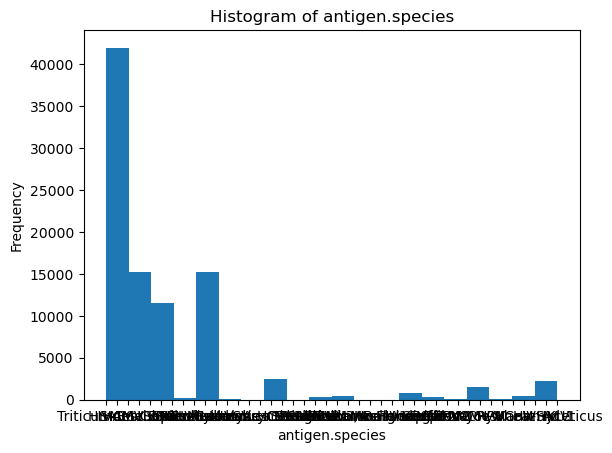

In [33]:
import matplotlib.pyplot as plt

plt.hist(data['antigen.species'], bins=20)  # 可以调整bin的数量
plt.xlabel('antigen.species')
plt.ylabel('Frequency')
plt.title('Histogram of antigen.species')
plt.show()

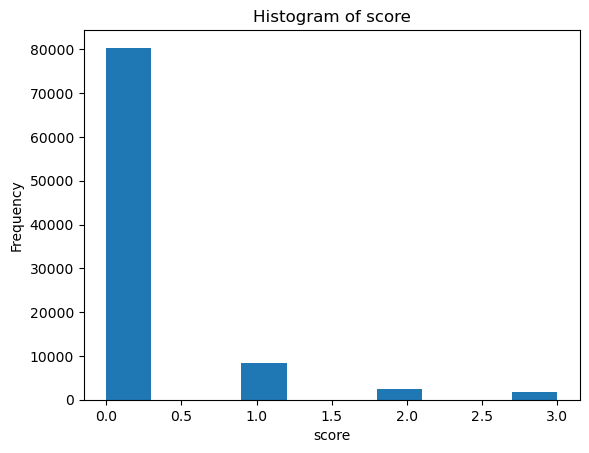

In [36]:
import matplotlib.pyplot as plt

plt.hist(data['vdjdb.score'], bins=10)  # 可以调整bin的数量
plt.xlabel('score')
plt.ylabel('Frequency')
plt.title('Histogram of score')
plt.show()

In [38]:
# Create a mapper

scale_mapper = {
    "MHCI": 1,
    "MHCII": 2
}

data['mhc.class'] = data['mhc.class'].replace(scale_mapper)

data

,complex.id,gene,cdr3,v.segm,j.segm,species,mhc.a,mhc.b,mhc.class,antigen.epitope,antigen.species,vdjdb.score,antigen.gene_5T4,antigen.gene_8F10,antigen.gene_ABCB5,antigen.gene_ABCD3,antigen.gene_ACTN4,antigen.gene_AFMID,antigen.gene_AHNAK,antigen.gene_AKAP13,antigen.gene_AKAP9,antigen.gene_AMPH,antigen.gene_ANKRD30A,antigen.gene_API5,antigen.gene_ARHGAP35,antigen.gene_ARMT1,antigen.gene_ASTN1,antigen.gene_BCL2L1,antigen.gene_BCR-ABL,antigen.gene_BMLF1,antigen.gene_BRAF,antigen.gene_BRAP,antigen.gene_BRLF1,antigen.gene_BST2,antigen.gene_BZLF1,antigen.gene_CADPS2,antigen.gene_CASP8,antigen.gene_CCND1,antigen.gene_CD74,antigen.gene_CDK4,antigen.gene_CDKN2A,antigen.gene_CENPL,antigen.gene_CFP10,antigen.gene_COL18A1,antigen.gene_CORE,antigen.gene_CRISPLD1,antigen.gene_CTBP1,antigen.gene_CTSB,antigen.gene_DBH,antigen.gene_DPY19L4,antigen.gene_DQ2-GLIA-OMEGA1,antigen.gene_DQ8-GLIA-ALPHA1,antigen.gene_DQ8.5-GLIA-GAMMA1,antigen.gene_Der,antigen.gene_E2,antigen.gene_E6,antigen.gene_E7,antigen.gene_EBNA1,antigen.gene_EBNA3A,antigen.gene_EBNA3B,antigen.gene_EBNA4,antigen.gene_EBNA6,antigen.gene_ELAVL4,antigen.gene_EMC,antigen.gene_ENR,antigen.gene_ERBB2,antigen.gene_ERBB2IP,antigen.gene_EXOC8,antigen.gene_Envelope,antigen.gene_FANCI,antigen.gene_FBXO21,antigen.gene_FGFR3,antigen.gene_FNDC3B,antigen.gene_GAG,antigen.gene_GANAB,antigen.gene_GAP50,antigen.gene_GCN1L1,antigen.gene_GEMIN,antigen.gene_GINS1,antigen.gene_GLUT-L1,antigen.gene_GNB5,antigen.gene_GNL3L,antigen.gene_GPC,antigen.gene_GPD2,antigen.gene_Gag,antigen.gene_Gliadin,antigen.gene_Gluten,antigen.gene_Gp33,antigen.gene_Gp33(PA),antigen.gene_Gp33(PF),antigen.gene_Gp33(Y4A),antigen.gene_Gp33-41,antigen.gene_Gtpbp1,antigen.gene_H3F3B,antigen.gene_HA,antigen.gene_HELZ2,antigen.gene_HER2,antigen.gene_HEXON,antigen.gene_HIVEP2,antigen.gene_HSD17B12,antigen.gene_IE-1,antigen.gene_IE1,antigen.gene_IE2,antigen.gene_IE3,antigen.gene_IGF2BP2,antigen.gene_INS,antigen.gene_INS-DRiP,antigen.gene_KARS,antigen.gene_KIAA0368,antigen.gene_KIAA1279,antigen.gene_KIAA1967,antigen.gene_KIF16B,antigen.gene_KLHL7,antigen.gene_KLK3,antigen.gene_KRAS,antigen.gene_KanJ,antigen.gene_Kctd20,antigen.gene_LGSN,antigen.gene_LMP1,antigen.gene_LMP2A,antigen.gene_LYZ,antigen.gene_Leader peptide,antigen.gene_M,antigen.gene_M1,antigen.gene_M1-F5L,antigen.gene_M1-G4E,antigen.gene_M2-1,antigen.gene_M38,antigen.gene_M45,antigen.gene_MAGE-A1,antigen.gene_MAGE-A2,antigen.gene_MAGE-A3,antigen.gene_MAGE-A4,antigen.gene_MAGEA1,antigen.gene_MAGEA3,antigen.gene_MAGEA6,antigen.gene_MART1,antigen.gene_MBP,antigen.gene_MCC,antigen.gene_MCC-P5E,antigen.gene_ME1,antigen.gene_MED13,antigen.gene_MEROPS,antigen.gene_MIM2,antigen.gene_MLANA,antigen.gene_MLL2,antigen.gene_MPV17,antigen.gene_MUC5AC,antigen.gene_Matrix,antigen.gene_Mbp,antigen.gene_Mimotope,antigen.gene_N,antigen.gene_NBAS,antigen.gene_NDC1,antigen.gene_NP,antigen.gene_NP338,antigen.gene_NRAS,antigen.gene_NS3,antigen.gene_NS4B,antigen.gene_NS5B,antigen.gene_NSP12,antigen.gene_NSP3,antigen.gene_NUP98,antigen.gene_NY-ESO,antigen.gene_NY-ESO-1,antigen.gene_NY-ESO-2,antigen.gene_NY-ESO-3,antigen.gene_NY-ESO-4,antigen.gene_NY-ESO-5,antigen.gene_NY-ESO-6,antigen.gene_Ndufa4,antigen.gene_Nef,antigen.gene_Nucleocapsid,antigen.gene_OPT,antigen.gene_ORF10,antigen.gene_ORF14,antigen.gene_ORF1a,antigen.gene_ORF1ab,antigen.gene_ORF3,antigen.gene_ORF6,antigen.gene_ORF7a,antigen.gene_ORF7b,antigen.gene_ORF8,antigen.gene_ORF9b,antigen.gene_OVA,antigen.gene_Ovotransferrin,antigen.gene_P18-I10,antigen.gene_P24,antigen.gene_P53,antigen.gene_PA,antigen.gene_PABPC1,antigen.gene_PADI4,antigen.gene_PB1,antigen.gene_PCPA12,antigen.gene_PCPB7,antigen.gene_PCPB9,antigen.gene_PCPC5,antigen.gene_PCPE3,antigen.gene_PDE4A,antigen.gene_PDE7B,antigen.gene_PDS5A,antigen.gene_PGM5,antigen.gene_PHKA1,antigen.gene_PHLPP1,antigen.gene_PIK3CA,antigen.gene_PLA2G6,antigen.gene_PLCD3,antigen.gene_PMEL,antigen.gene_POGK,antigen.gene_PORCN,antigen.gene_PPE33,antigen.gene_PPM1,antigen.gene_PPM1F,antigen.gene_PT